# **Hotel Reservation Prediction**
-----

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/rithul.v/Desktop/Hotel_Reservation_Project/artifacts/raw/train.csv')

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## 1. Understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [5]:
data.drop(['Booking_ID'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [7]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(7661)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.shape

(21359, 18)

In [12]:
summary = {}

for col in data.columns:
    summary[col] = {
        'nunique':data[col].nunique(),
        'unique_values':data[col].unique()
    }

summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df

,nunique,unique_values
no_of_adults,5,"[2, 1, 3, 0, 4]"
no_of_children,6,"[1, 0, 2, 9, 3, 10]"
no_of_weekend_nights,7,"[2, 1, 0, 4, 3, 6, 5]"
no_of_week_nights,18,"[1, 3, 5, 2, 0, 11, 4, 7, 6, 8, 13, 10, 9, 15,..."
type_of_meal_plan,4,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ..."
required_car_parking_space,2,"[0, 1]"
room_type_reserved,7,"[Room_Type 1, Room_Type 6, Room_Type 5, Room_T..."
lead_time,348,"[26, 98, 433, 195, 188, 74, 273, 6, 89, 56, 10..."
arrival_year,2,"[2017, 2018]"
arrival_month,12,"[10, 7, 9, 8, 6, 4, 5, 12, 3, 2, 11, 1]"


In [13]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

*Our data is imbalanced*

In [14]:
summary_df

,nunique,unique_values
no_of_adults,5,"[2, 1, 3, 0, 4]"
no_of_children,6,"[1, 0, 2, 9, 3, 10]"
no_of_weekend_nights,7,"[2, 1, 0, 4, 3, 6, 5]"
no_of_week_nights,18,"[1, 3, 5, 2, 0, 11, 4, 7, 6, 8, 13, 10, 9, 15,..."
type_of_meal_plan,4,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ..."
required_car_parking_space,2,"[0, 1]"
room_type_reserved,7,"[Room_Type 1, Room_Type 6, Room_Type 5, Room_T..."
lead_time,348,"[26, 98, 433, 195, 188, 74, 273, 6, 89, 56, 10..."
arrival_year,2,"[2017, 2018]"
arrival_month,12,"[10, 7, 9, 8, 6, 4, 5, 12, 3, 2, 11, 1]"


In [15]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'market_segment_type','room_type_reserved', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_special_requests','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']

In [16]:
len(cat_cols), len(num_cols)

(6, 12)

## 2. Exploratory Data Analysis

In [17]:
df = data.copy()

In [18]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [19]:
def univariate_analysis_num(dataset, num_cols, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.tight_layout(pad=5.0)
    for i, col in enumerate(num_cols):
        sns.histplot(dataset[col], bins=30, ax=axes[i,0], color='skyblue', kde=True)
        axes[i,0].set_title(f'Histogram of {col}')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Frequency')

        sns.boxplot(x=dataset[col], ax=axes[i,1], color='lightgreen')
        axes[i,1].set_title(f'Boxplot of {col}')
        axes[i,1].set_xlabel(col)
    
    plt.show()

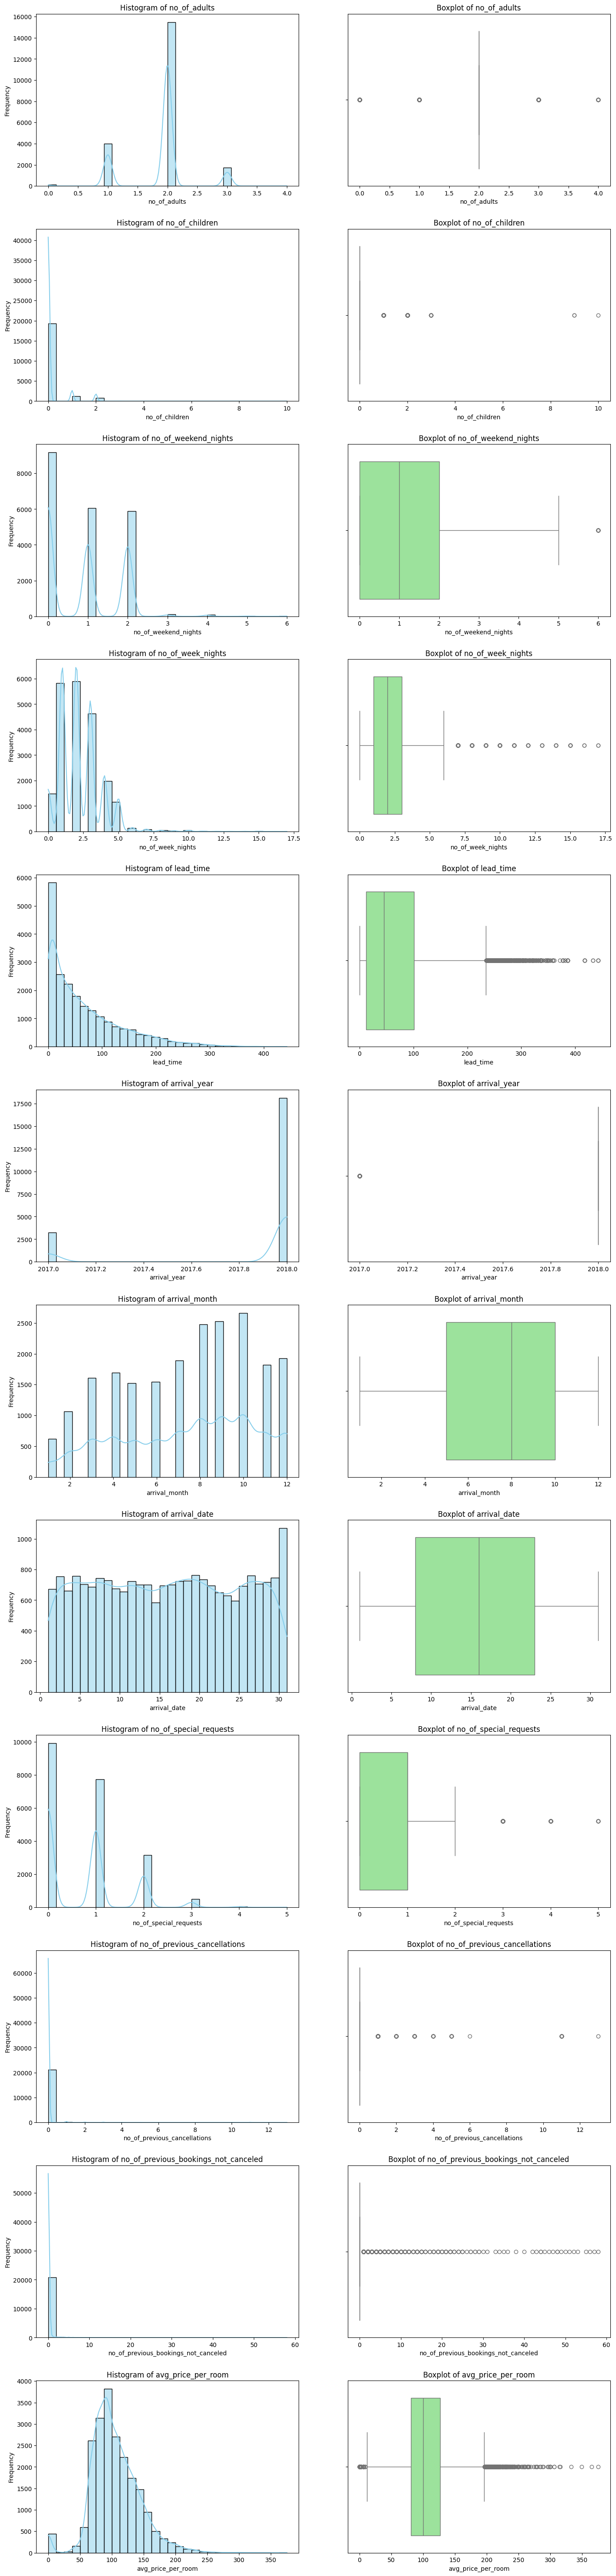

In [20]:
univariate_analysis_num(df, num_cols, n_cols=2, n_rows=len(num_cols))

In [21]:
def univariate_analysis_cat(dataset, cat_cols, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        barplot = sns.countplot(x=dataset[col], ax=ax, palette='Set2')
        ax.set_title(f'Barplot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)

        for container in barplot.containers:
          ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

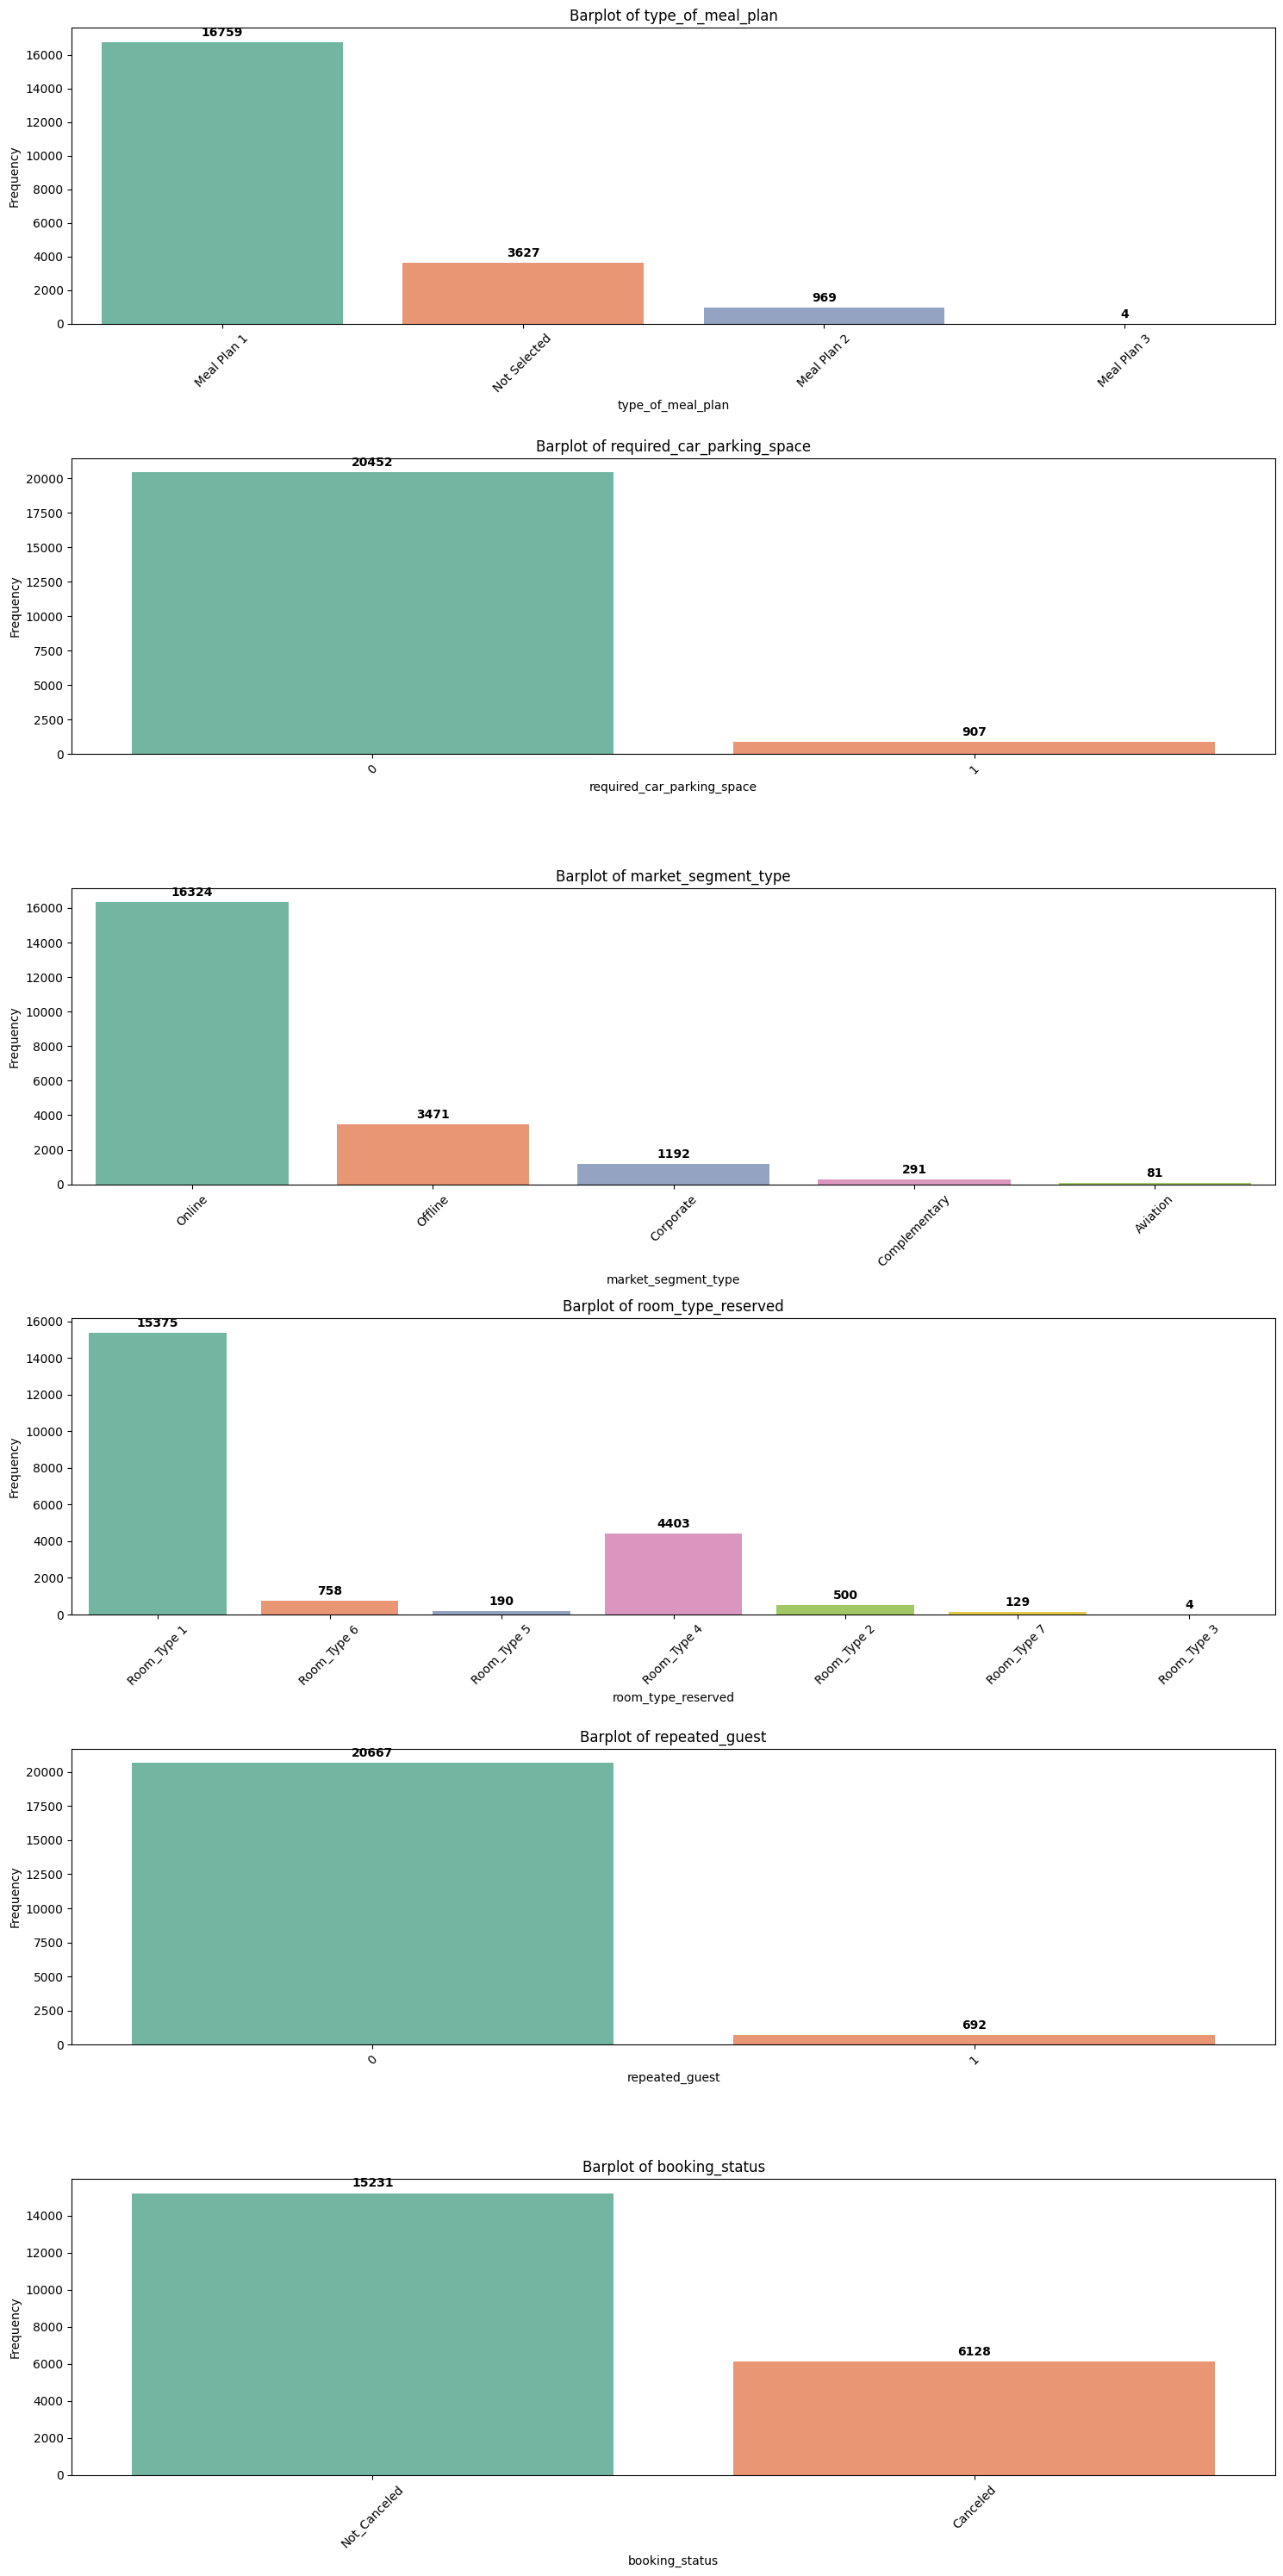

In [22]:
univariate_analysis_cat(df, cat_cols, n_cols=1, n_rows=len(cat_cols))

In [23]:
def bivariate_analysis_num_target(dataset, num_cols, target_col, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.boxplot(x=target_col, y=col, data=dataset, ax=ax, palette='Set1')
        ax.set_title(f'Boxplot of {col} by {target_col}')
        ax.set_xlabel(target_col)
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()

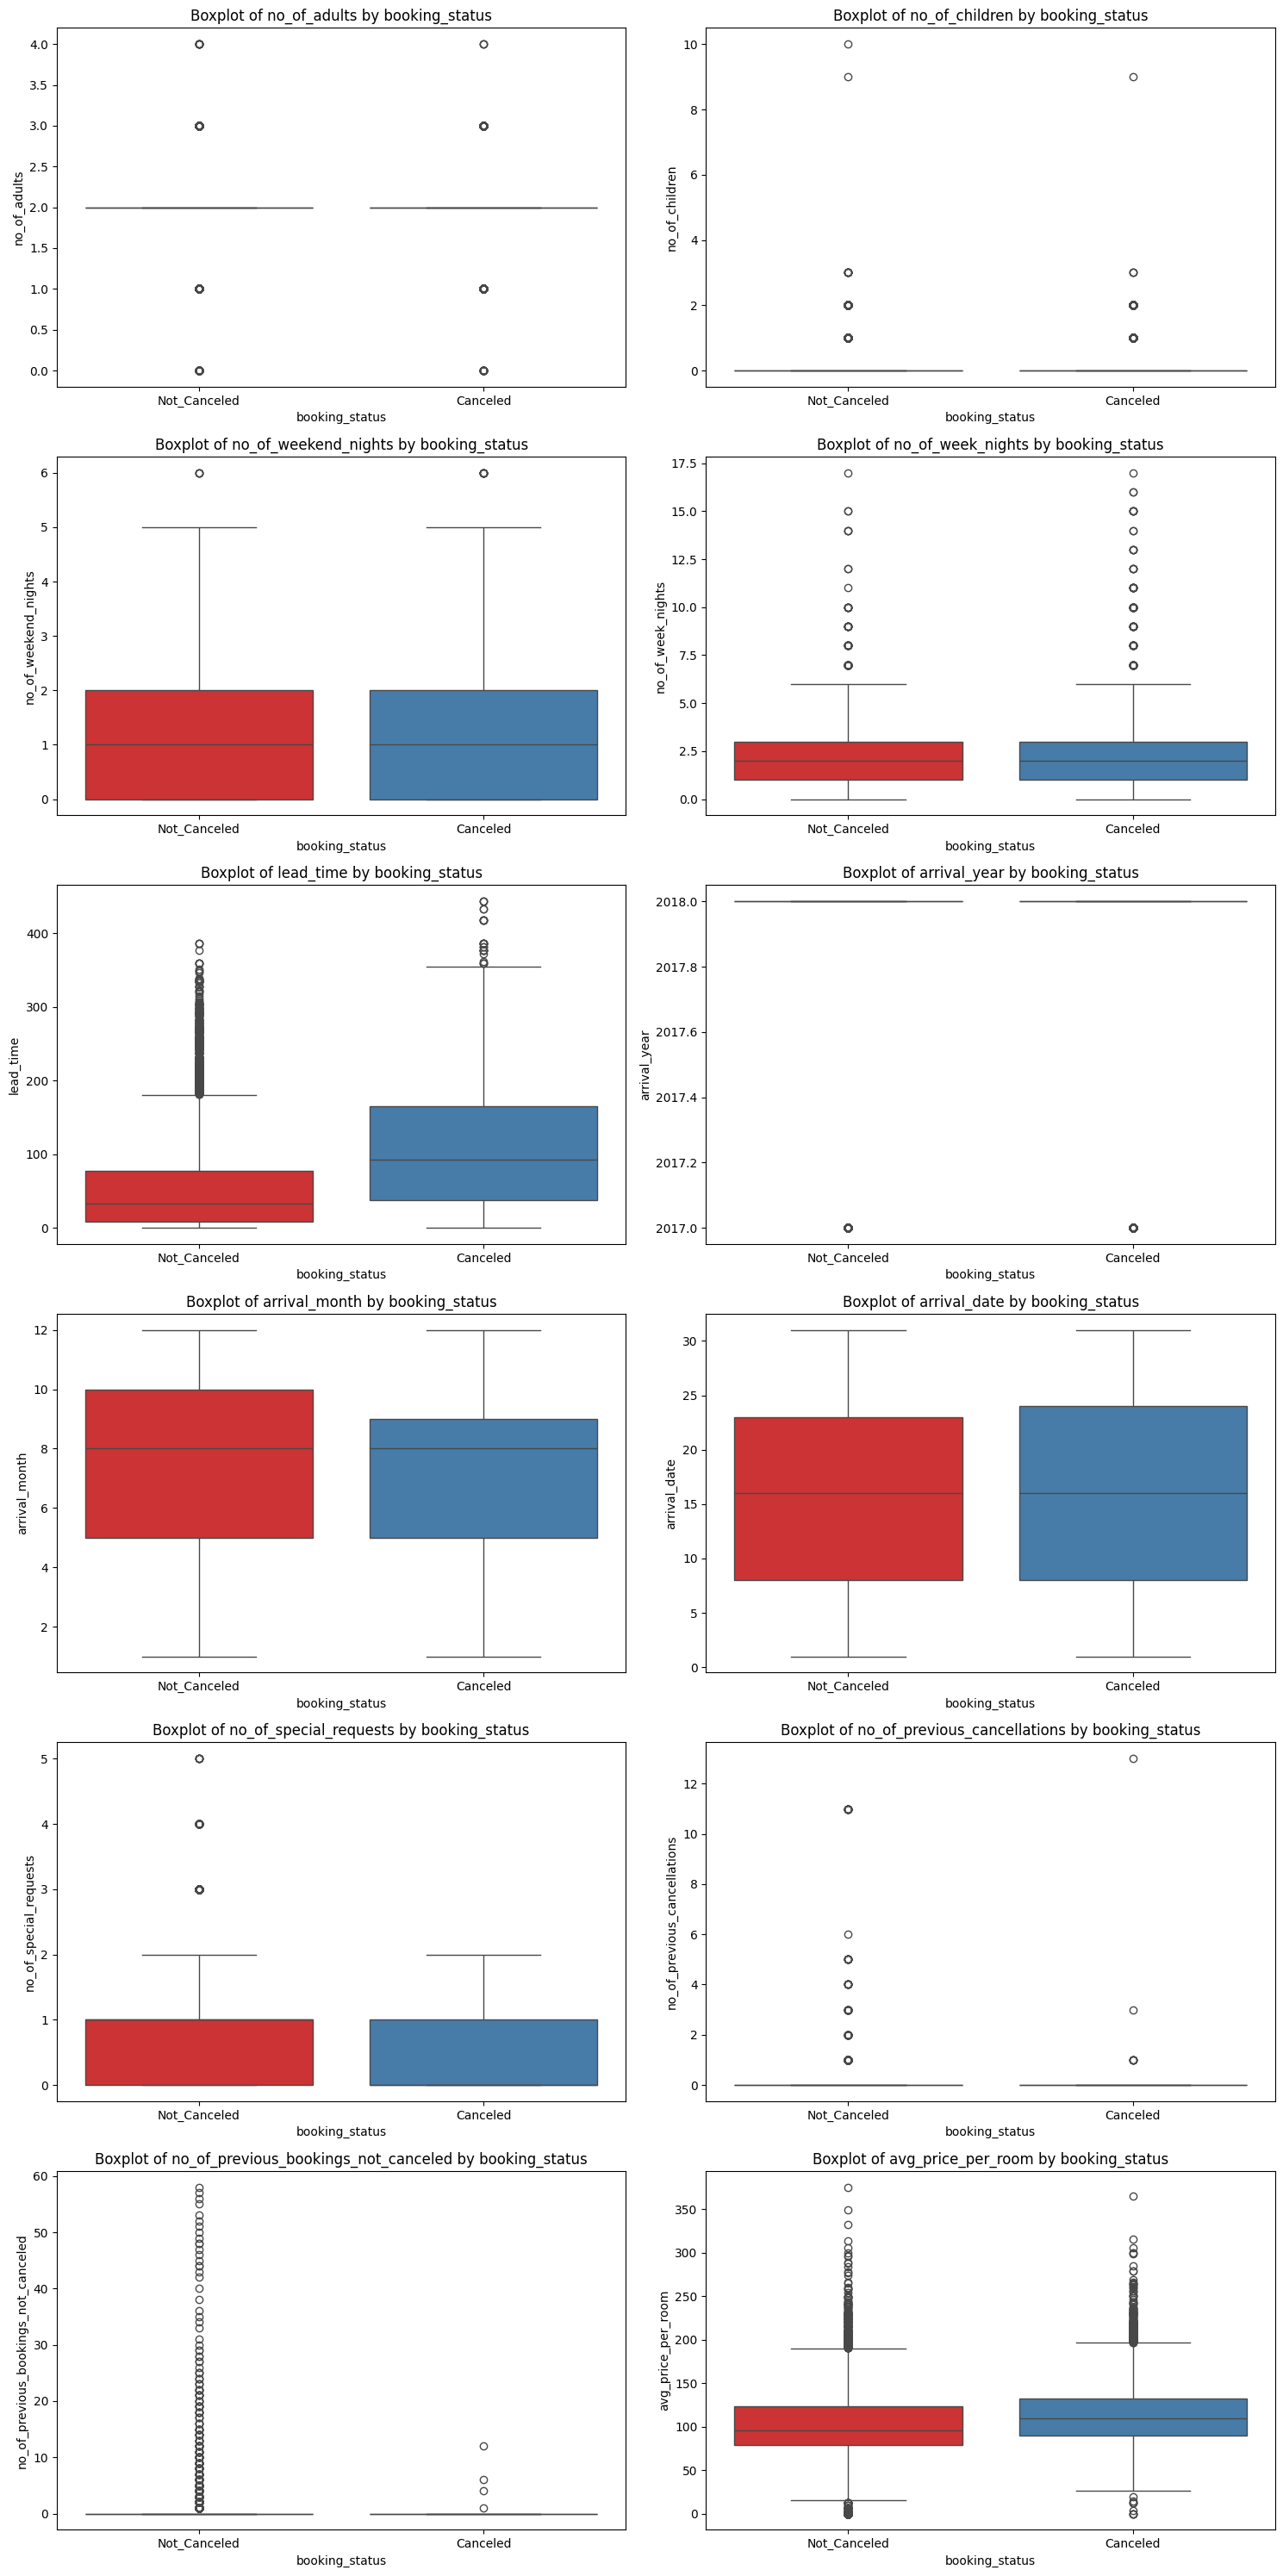

In [24]:
bivariate_analysis_num_target(df, num_cols, 'booking_status', n_cols=2, n_rows=6)

Text(0.5, 1.0, 'Average Price per Room by Arrival Month')

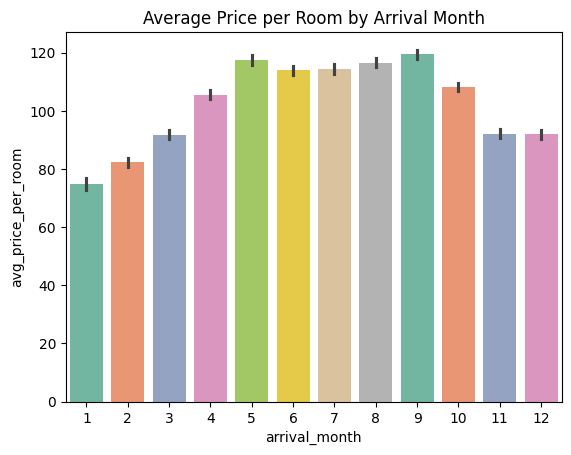

In [25]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=df, palette='Set2')
plt.title('Average Price per Room by Arrival Month')

In [26]:
def bivariate_analysis_cat_target(dataset, num_cols, target_col, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        barplot = sns.countplot(x=col, hue=target_col, data=dataset, ax=ax, palette='Set1')
        ax.set_title(f'Count plot of {col} by {target_col}')
        ax.set_xlabel(target_col)
        ax.set_ylabel(col)

        for container in barplot.containers:
          ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

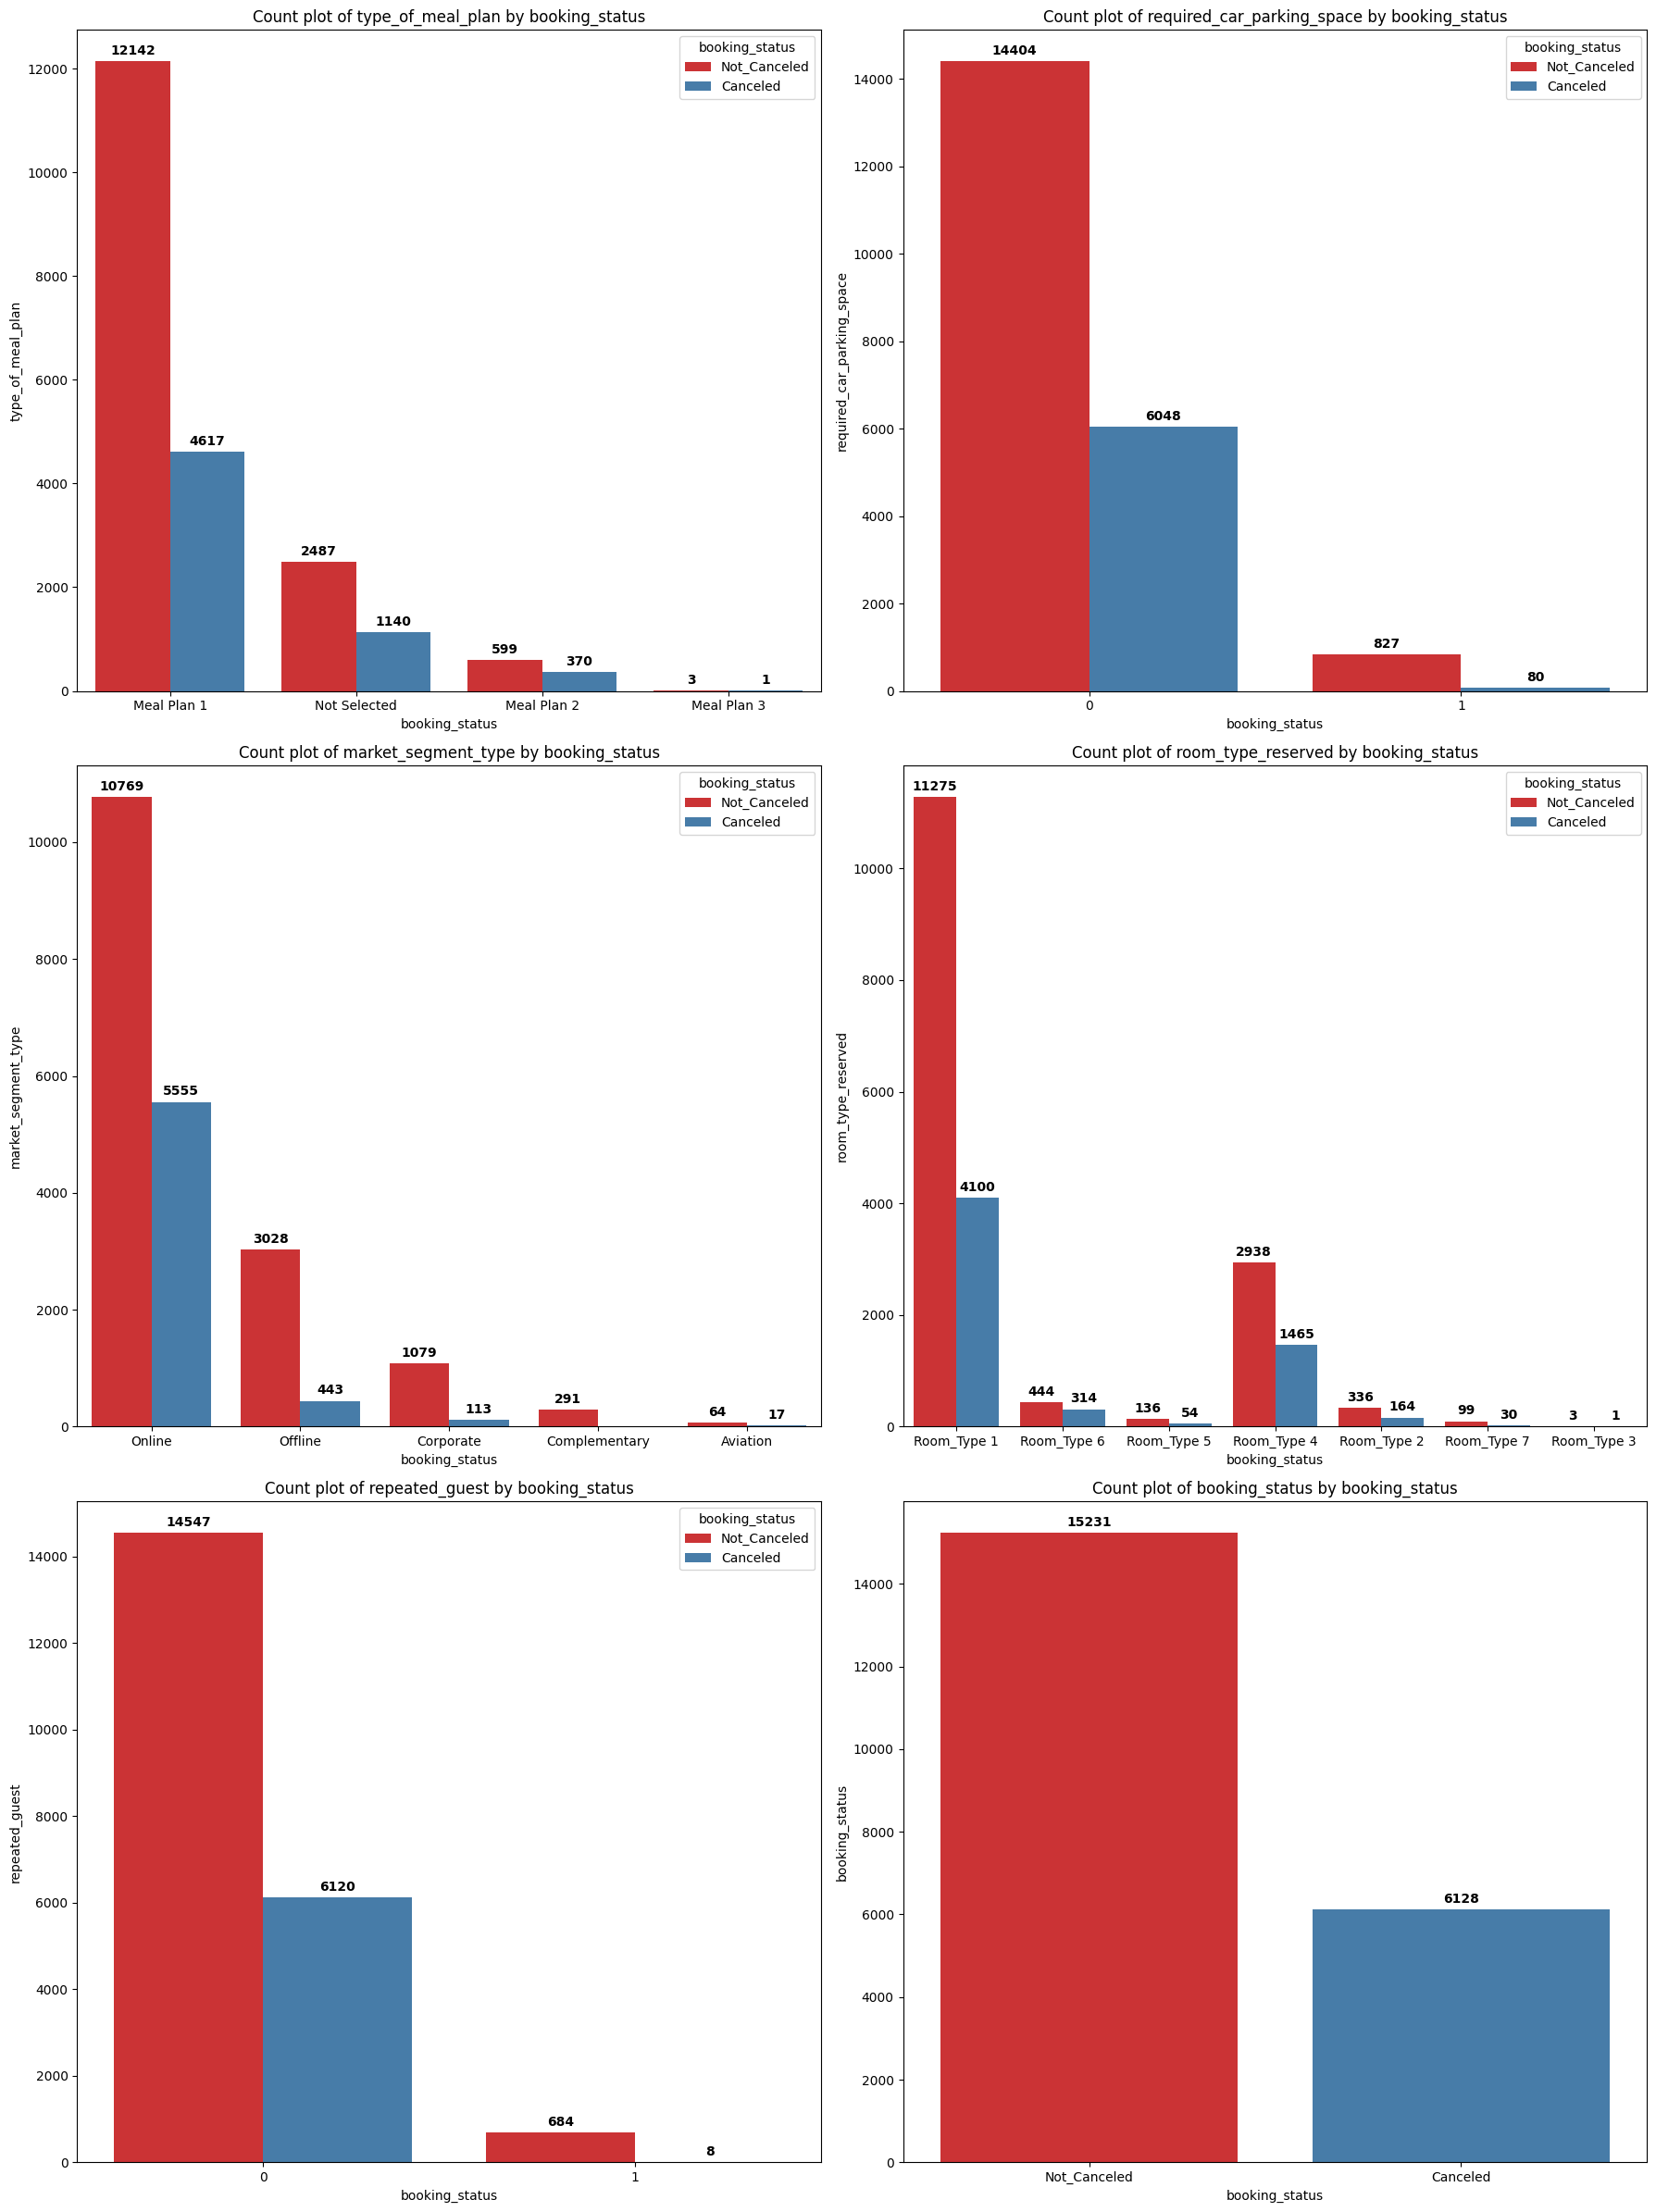

In [27]:
bivariate_analysis_cat_target(df, cat_cols, 'booking_status', n_cols=2, n_rows=3)

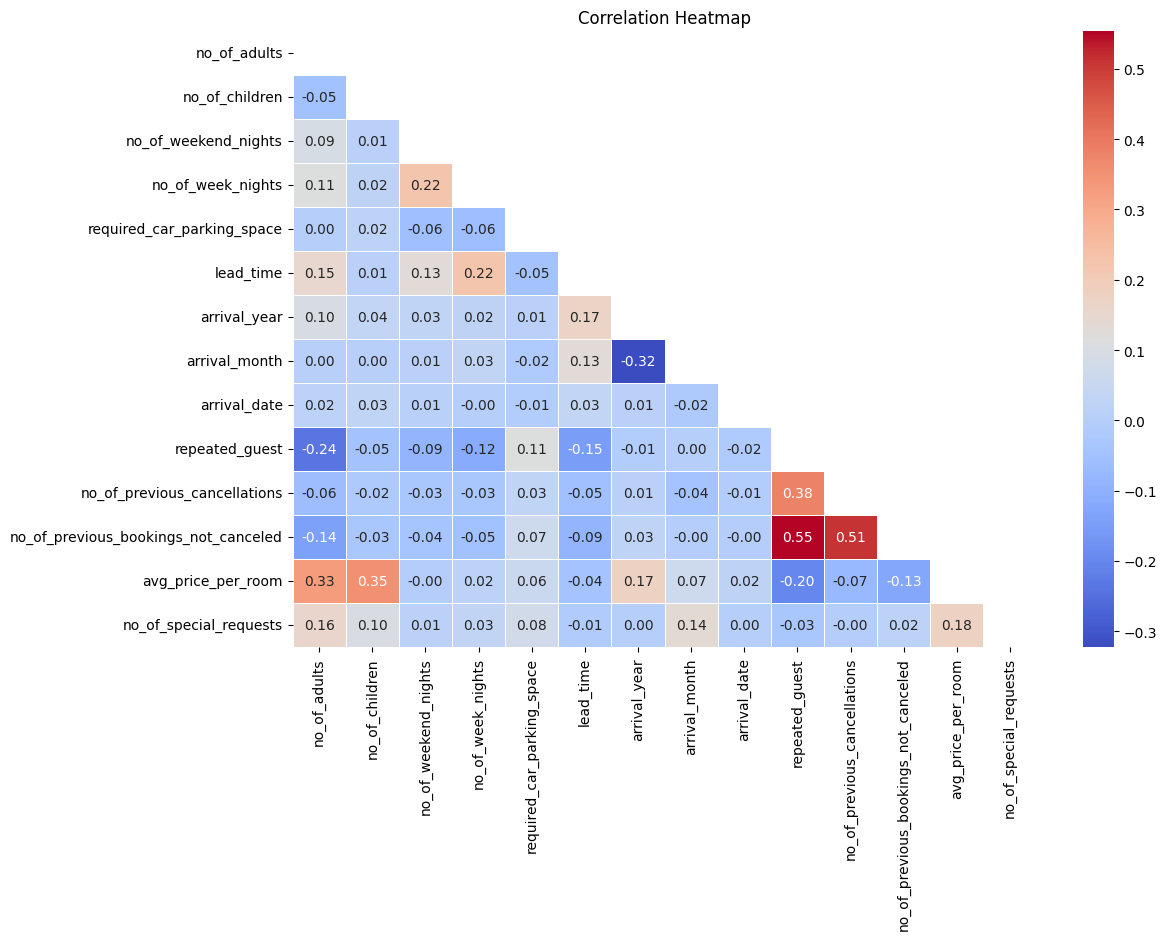

In [28]:
corr = df[df.select_dtypes(exclude=['object']).columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Data Processing

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [30]:
summary_df

,nunique,unique_values
no_of_adults,5,"[2, 1, 3, 0, 4]"
no_of_children,6,"[1, 0, 2, 9, 3, 10]"
no_of_weekend_nights,7,"[2, 1, 0, 4, 3, 6, 5]"
no_of_week_nights,18,"[1, 3, 5, 2, 0, 11, 4, 7, 6, 8, 13, 10, 9, 15,..."
type_of_meal_plan,4,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ..."
required_car_parking_space,2,"[0, 1]"
room_type_reserved,7,"[Room_Type 1, Room_Type 6, Room_Type 5, Room_T..."
lead_time,348,"[26, 98, 433, 195, 188, 74, 273, 6, 89, 56, 10..."
arrival_year,2,"[2017, 2018]"
arrival_month,12,"[10, 7, 9, 8, 6, 4, 5, 12, 3, 2, 11, 1]"


*Lets use Label Encoding on the categorical columns*

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    

In [33]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [34]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


*Checking Multicollinearity*

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [36]:
x = add_constant(df.drop('booking_status', axis=1))

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data = vif_data[vif_data['feature'] != 'const']
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,feature,VIF
16,avg_price_per_room,1.887310
13,repeated_guest,1.763523
15,no_of_previous_bookings_not_canceled,1.711562
12,market_segment_type,1.669975
7,room_type_reserved,1.549597
14,no_of_previous_cancellations,1.395950
1,no_of_adults,1.341102
9,arrival_year,1.287092
2,no_of_children,1.282198
10,arrival_month,1.247491


*Our data doesnt have any multicollinearity as the values are less than 5.*

*Now, lets look for skewness*

In [40]:
skewness = df.skew(axis=0)
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [41]:
for col in df.columns:
    if abs(skewness[col]) > 5:
        df[col] = np.log1p(df[col])
        

In [42]:
skewness = df.skew(axis=0)
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

*Handling imbalanced data*

In [43]:
df['booking_status'].value_counts(normalize=True)

booking_status
1    0.713095
0    0.286905
Name: proportion, dtype: float64

*Here, we will perform oversampling*

In [44]:
x = df.drop('booking_status',axis=1)
y = df['booking_status']

In [45]:
from imblearn.over_sampling import SMOTE 

In [46]:
smote = SMOTE(random_state=42)

x_res, y_res = smote.fit_resample(x,y)

In [48]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [49]:
balanced_df = pd.DataFrame(x_res, columns=x.columns)
balanced_df['booking_status'] = y_res.values
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [50]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          30462 non-null  int64  
 1   no_of_children                        30462 non-null  int64  
 2   no_of_weekend_nights                  30462 non-null  int64  
 3   no_of_week_nights                     30462 non-null  int64  
 4   type_of_meal_plan                     30462 non-null  int64  
 5   required_car_parking_space            30462 non-null  int64  
 6   room_type_reserved                    30462 non-null  int64  
 7   lead_time                             30462 non-null  int64  
 8   arrival_year                          30462 non-null  int64  
 9   arrival_month                         30462 non-null  int64  
 10  arrival_date                          30462 non-null  int64  
 11  market_segment_

In [51]:
df = balanced_df.copy()

In [52]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


## 4. Feature Selection

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
x = df.drop('booking_status',axis=1)
y = df['booking_status']

In [55]:
model = RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [56]:
model.feature_importances_
importance_df = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})

In [57]:
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
7,lead_time,0.260558
16,no_of_special_requests,0.183754
15,avg_price_per_room,0.148938
9,arrival_month,0.086412
10,arrival_date,0.084801
11,market_segment_type,0.057133
3,no_of_week_nights,0.044620
2,no_of_weekend_nights,0.030393
4,type_of_meal_plan,0.020435
6,room_type_reserved,0.019681


In [62]:
top_10_featues = importance_df.head(10)['feature'].tolist()
top_10_featues

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'type_of_meal_plan',
 'room_type_reserved']

In [63]:
df = df[top_10_featues + ['booking_status']].copy()

In [64]:
df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


## 5. Model Selection

In [65]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [66]:
x = df.drop('booking_status',axis=1)
y = df['booking_status']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y, shuffle=True)


In [69]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [70]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': [],
    'ROC_AUC': []
}

In [71]:
for model_name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)
    metrics['ROC_AUC'].append(roc_auc)

[LightGBM] [Info] Number of positive: 12185, number of negative: 12184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500021 -> initscore=0.000082
[LightGBM] [Info] Start training from score 0.000082


In [73]:
metrics_df = pd.DataFrame(metrics)

In [74]:
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score,ROC_AUC
0,Logistic Regression,0.776957,0.738674,0.799858,0.768049,0.776951
1,Random Forest,0.887248,0.886408,0.887866,0.887137,0.887248
2,Gradient Boosting,0.829969,0.854892,0.814259,0.834081,0.829973
3,AdaBoost,0.800263,0.779054,0.813507,0.795908,0.800259
4,Support Vector Classifier,0.723946,0.707485,0.731500,0.719292,0.723943
5,Decision Tree,0.838503,0.824032,0.848546,0.836109,0.838501
6,K-Nearest Neighbors,0.781553,0.685489,0.848436,0.758308,0.781537
7,Gaussian Naive Bayes,0.764648,0.721602,0.789511,0.754031,0.764641
8,XGBoost,0.864106,0.870650,0.859365,0.864971,0.864107
9,LightGBM,0.858362,0.877544,0.845084,0.861008,0.858365


*We will go with Random Forest Model*

## 6. Random Forest HyperParameter Tuning 

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [95]:
x = df.drop('booking_status',axis=1)
y = df['booking_status']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y, shuffle=True)


In [98]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [99]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, 
                                   n_jobs=-1, scoring='accuracy')

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, criterion=log_loss, max_depth=28, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   3.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=28, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   3.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=28, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   3.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=28, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   3.3s
[CV] END bootstrap=True, criterion=log_loss, max_depth=28, min_samples_leaf=3, min_samples_split=4, n_estimators=187; total time=   3.3s
[CV] END bootstrap=True, criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=9, n_estimators=288; total

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16b7ee6d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16b6fabd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16b79f450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16b7ed9b0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [100]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': 45,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 420}

In [101]:
best_rf = random_search.best_estimator_

In [102]:
y_pred = best_rf.predict(x_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [104]:
metrics = {
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': [],
    'ROC_AUC': []
}

metrics['Accuracy'].append(accuracy)
metrics['Recall'].append(recall)
metrics['Precision'].append(precision)
metrics['F1 Score'].append(f1)
metrics['ROC_AUC'].append(roc_auc)

In [105]:
metrics_best_rf_df = pd.DataFrame(metrics)
metrics_best_rf_df

,Accuracy,Recall,Precision,F1 Score,ROC_AUC
0,0.886099,0.889363,0.883562,0.886453,0.886099


## 7. Save the model

In [106]:
import joblib

In [107]:
joblib.dump(best_rf, "random_forest_model.pkl")

['random_forest_model.pkl']

Exception ignored in: <function ResourceTracker.__del__ at 0x105d5f880>
Traceback (most recent call last):
  File "/Users/rithul.v/.local/share/uv/python/cpython-3.13.3-macos-aarch64-none/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/rithul.v/.local/share/uv/python/cpython-3.13.3-macos-aarch64-none/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/rithul.v/.local/share/uv/python/cpython-3.13.3-macos-aarch64-none/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1051f3880>
Traceback (most recent call last):
  File "/Users/rithul.v/.local/share/uv/python/cpython-3.13.3-macos-aarch64-none/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/rithul.v/.local/share/uv/python/cpython-3.13.3-macos-aarch64-none/lib/python3.13/multiprocessing/resou

*When we deploy the model then we need to go with lesser model size (less MB file). Here the Random Forest Model is around 200 MB file size. So we will use LightGBM which somewhat as similar accuracy but it will have smaller pkl size.*